# Data Project - Stock Market Analysis 

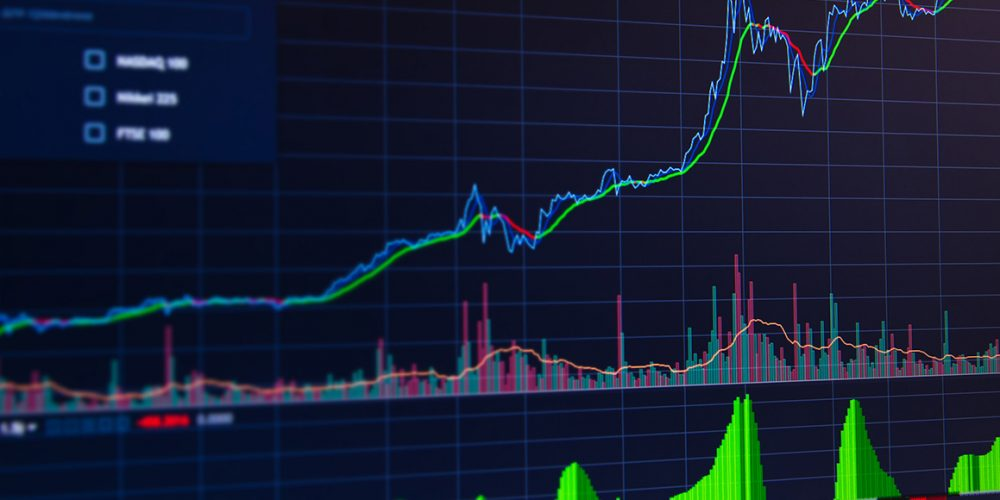

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

You should consider upgrading via the 'D:\Stock_Research\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-23 00:00:00-05:00,97.559998,97.779999,95.860001,97.519997,97.519997,76501100,AMAZON
2023-01-24 00:00:00-05:00,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,AMAZON
2023-01-25 00:00:00-05:00,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,AMAZON
2023-01-26 00:00:00-05:00,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,AMAZON
2023-01-27 00:00:00-05:00,99.529999,103.489998,99.529999,102.239998,102.239998,87678100,AMAZON
2023-01-30 00:00:00-05:00,101.089996,101.739998,99.010002,100.550003,100.550003,70691900,AMAZON
2023-01-31 00:00:00-05:00,101.160004,103.349998,101.139999,103.129997,103.129997,66527300,AMAZON
2023-02-01 00:00:00-05:00,102.529999,106.239998,101.239998,105.150002,105.150002,80450100,AMAZON
2023-02-02 00:00:00-05:00,110.250000,114.000000,108.879997,112.910004,112.910004,158154200,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.679801,153.818884,149.669442,151.830080,151.467069,8.561729e+07
std,12.982458,12.866010,12.994822,12.963017,12.777010,2.304146e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,142.190201,7.018920e+07
50%,149.500000,151.570007,147.820007,150.429993,150.179993,8.054620e+07
75%,162.190002,165.070000,159.754997,163.059998,162.325653,9.393295e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-04 00:00:00-05:00 to 2023-02-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

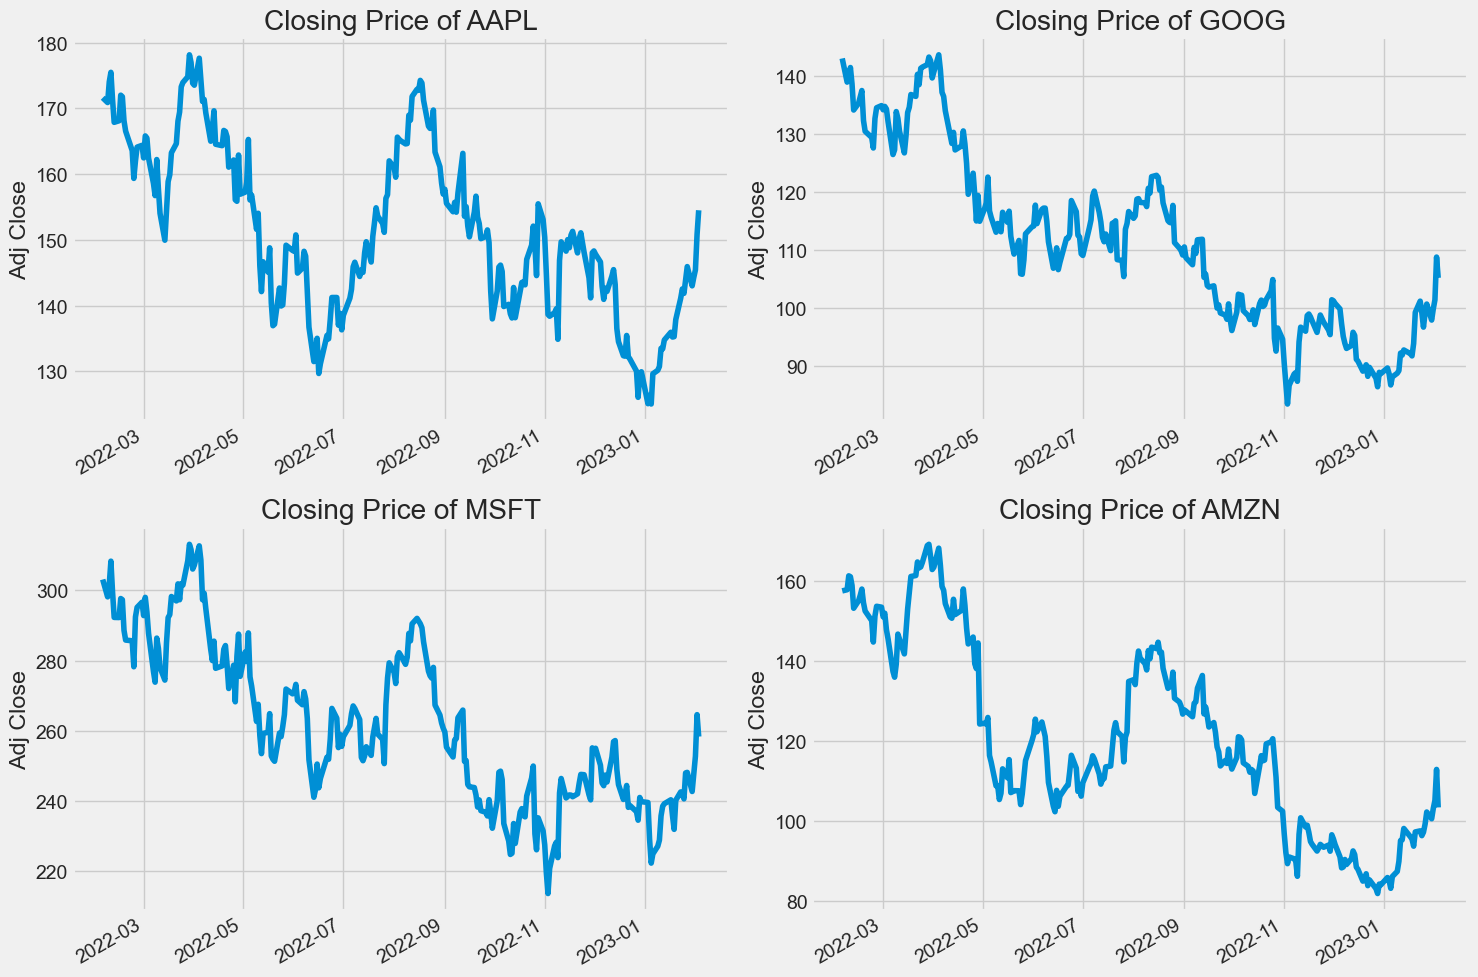

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

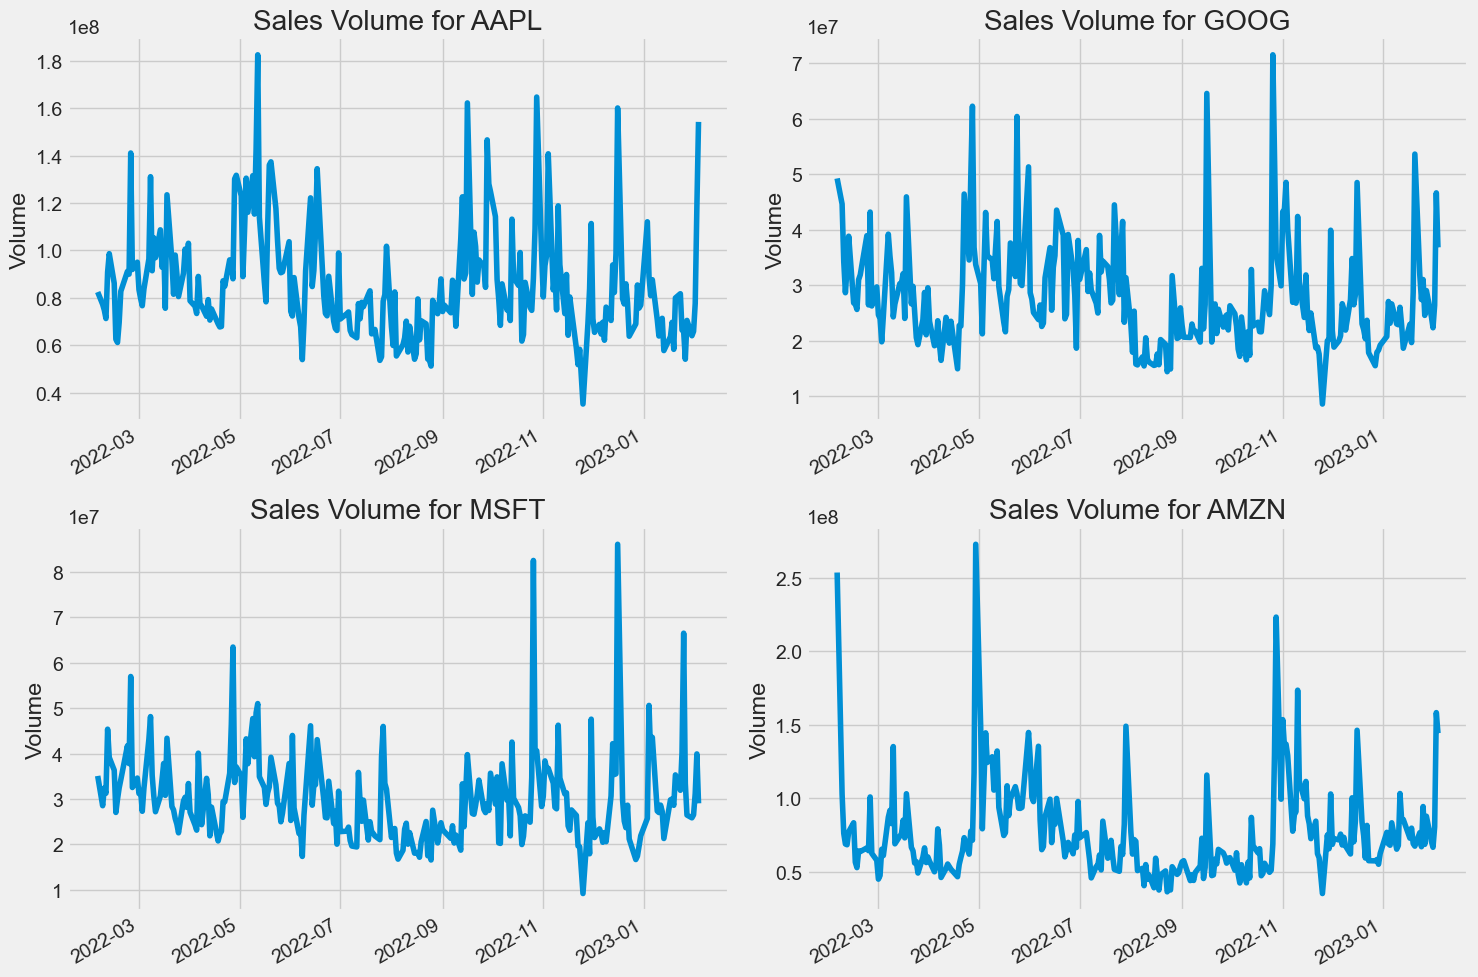

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

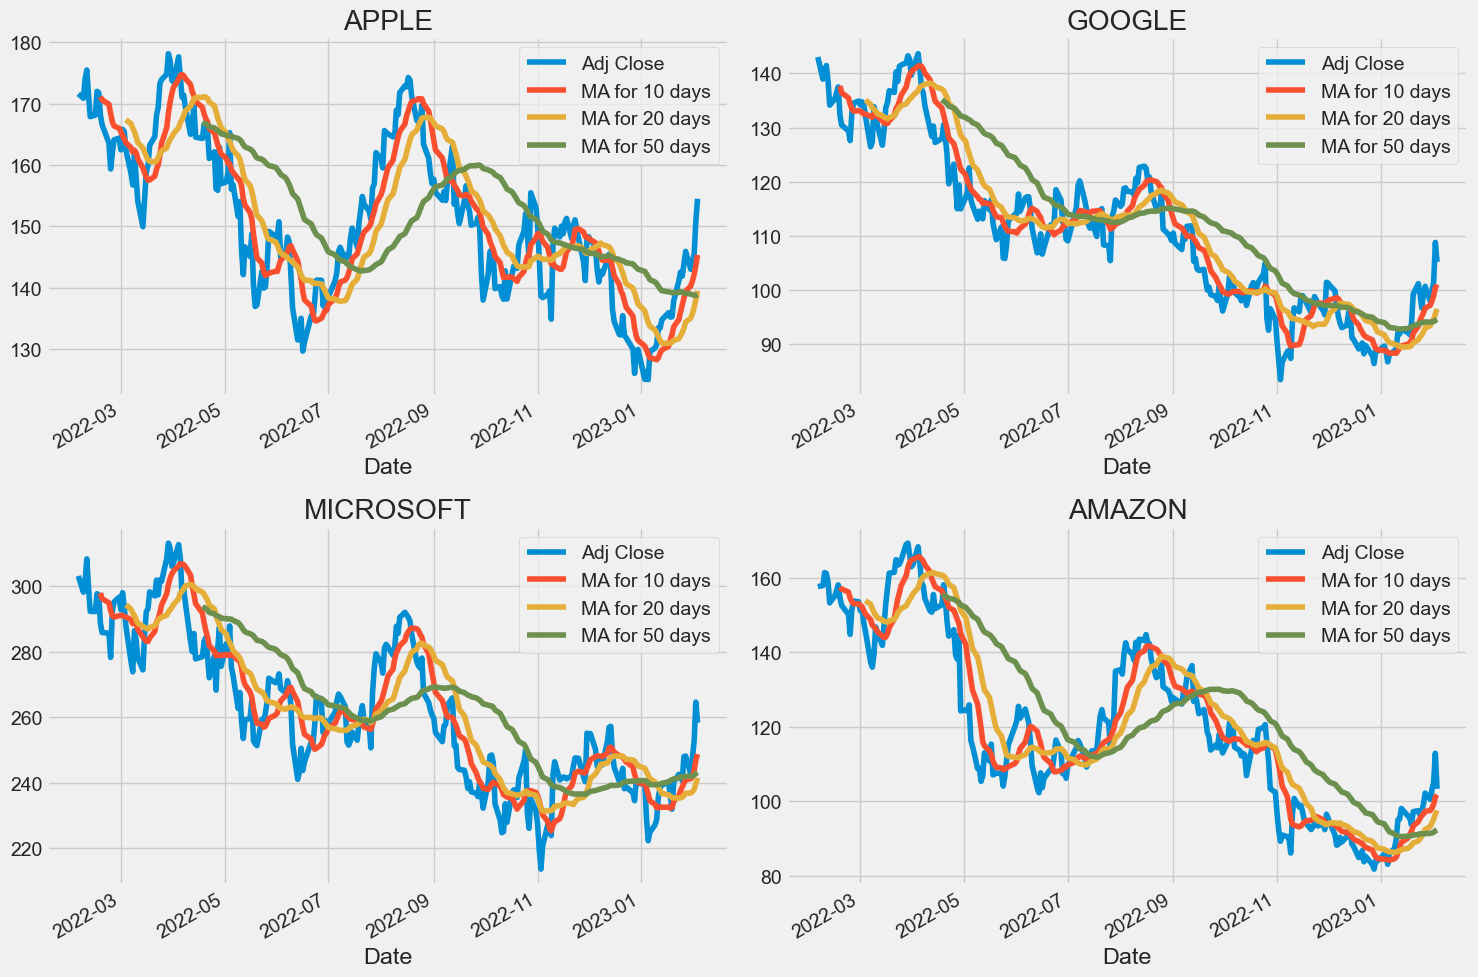

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

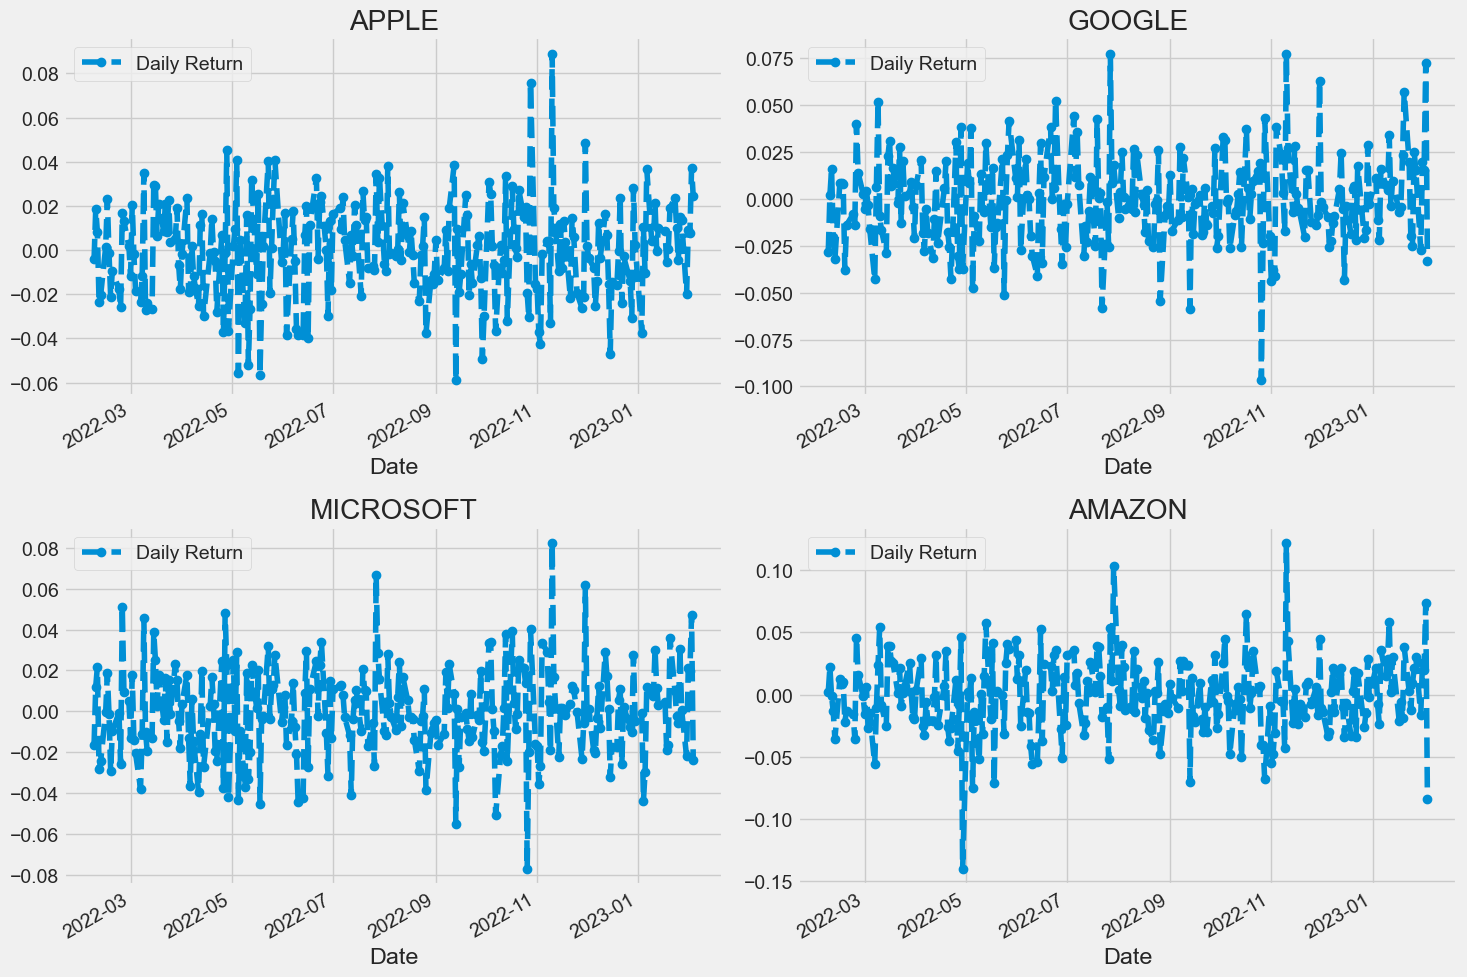

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

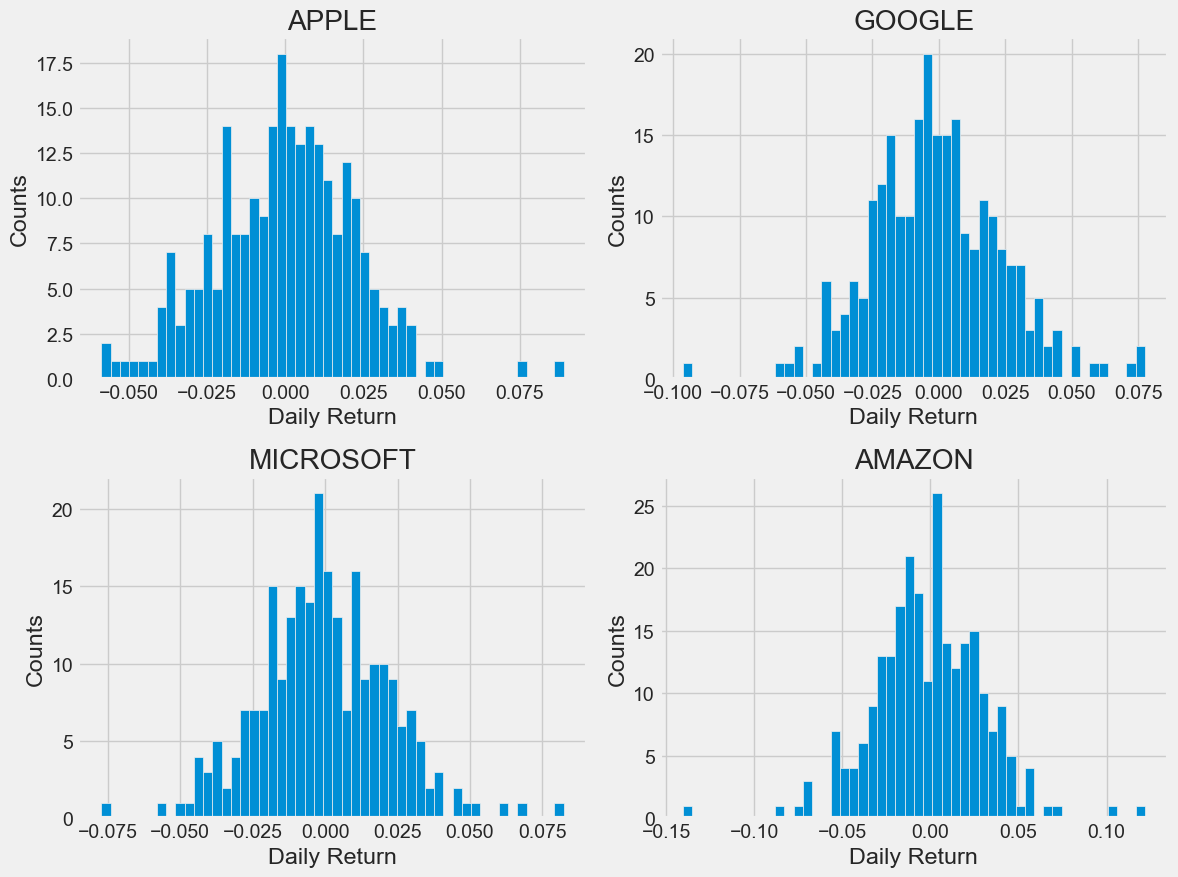

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
print(tech_list)
print(start)
print(end)
print(type(AAPL))
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df = yf.download(tech_list, start, end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

['AAPL', 'GOOG', 'MSFT', 'AMZN']
2022-02-04 00:00:00
2023-02-04 23:36:58.530192
<class 'pandas.core.frame.DataFrame'>
[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-04 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-02-07 00:00:00-05:00,-0.004235,0.001878,-0.028514,-0.016310
2022-02-08 00:00:00-05:00,0.018467,0.022022,0.001979,0.011995
2022-02-09 00:00:00-05:00,0.008294,-0.001388,0.016090,0.021835
2022-02-10 00:00:00-05:00,-0.023599,-0.013562,-0.020152,-0.028373


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

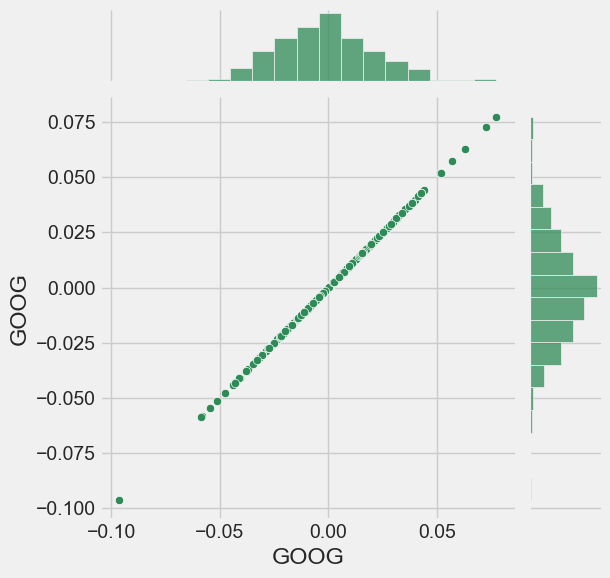

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

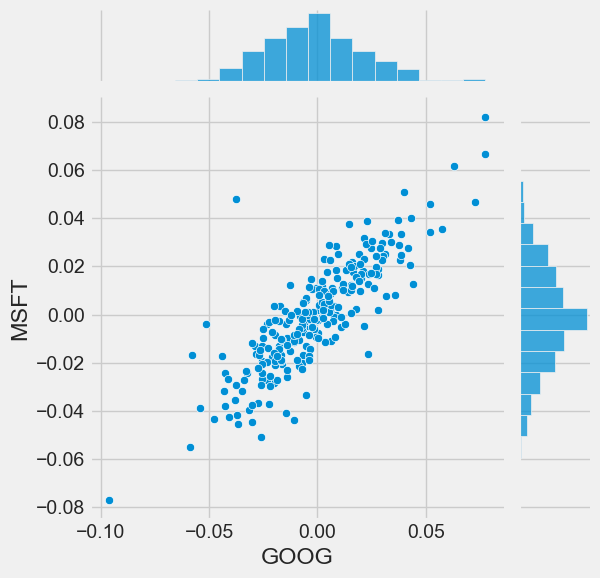

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

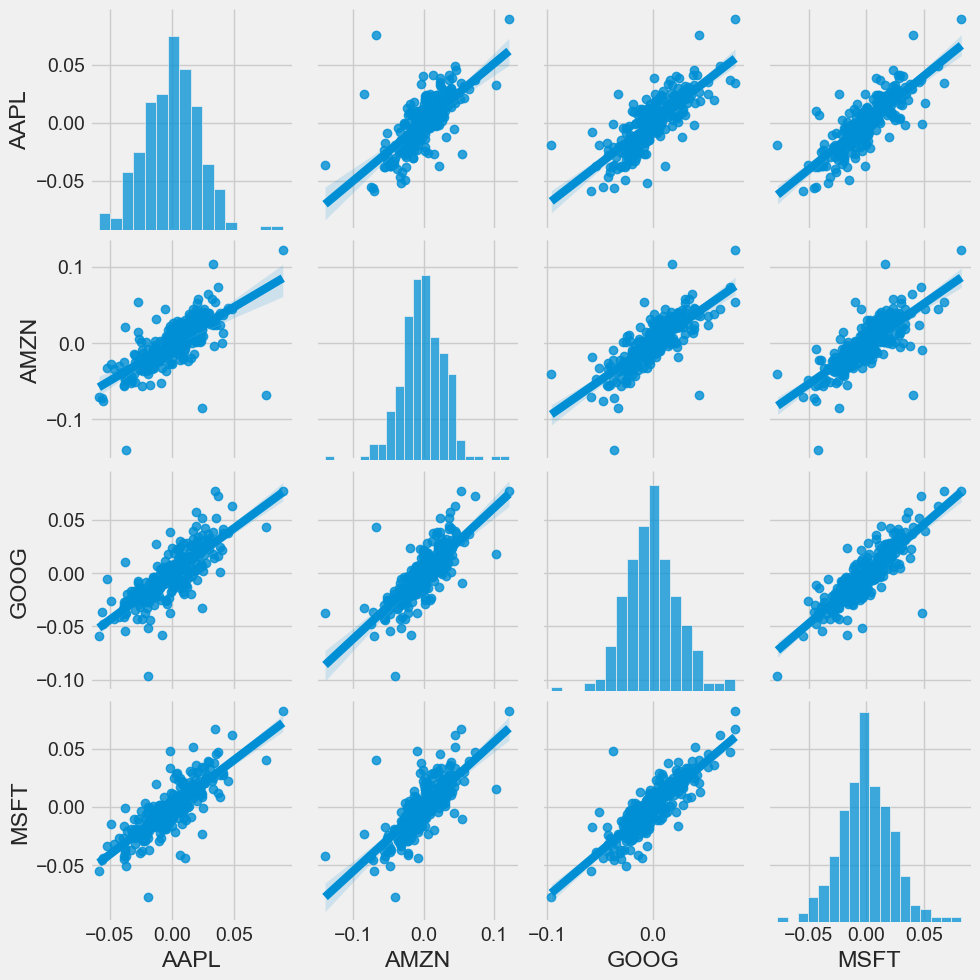

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

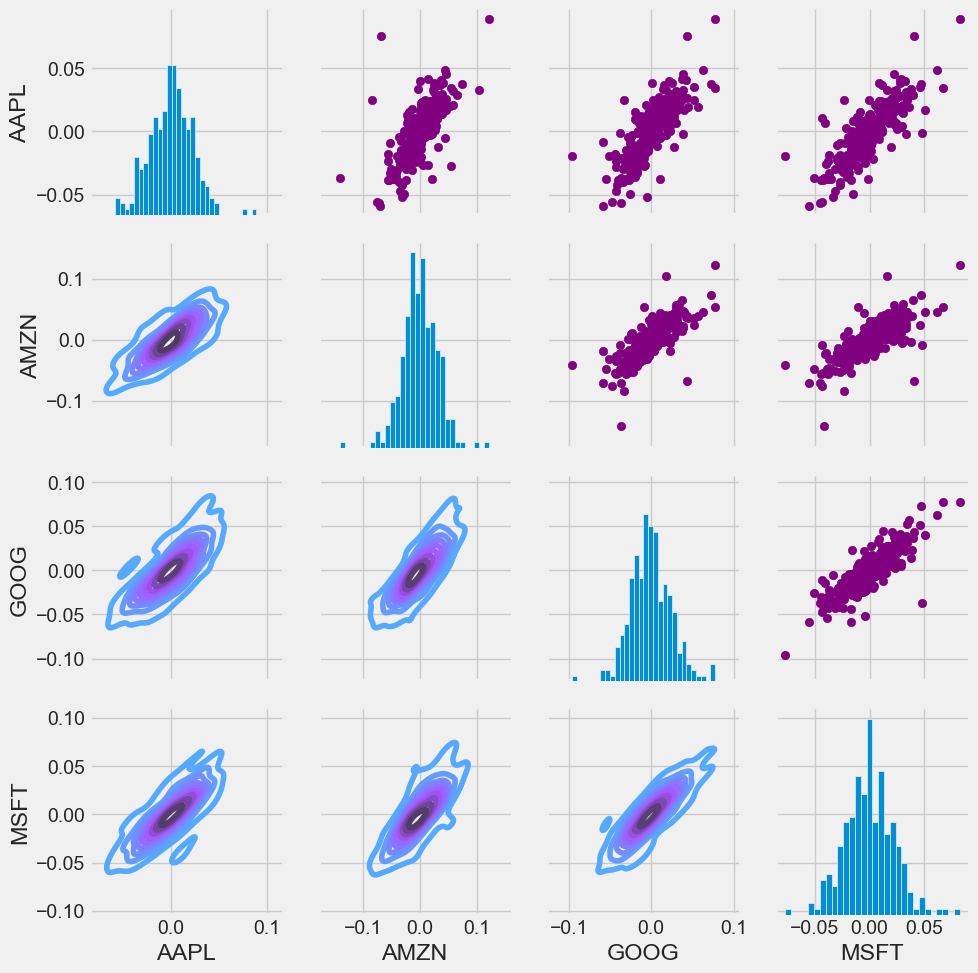

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

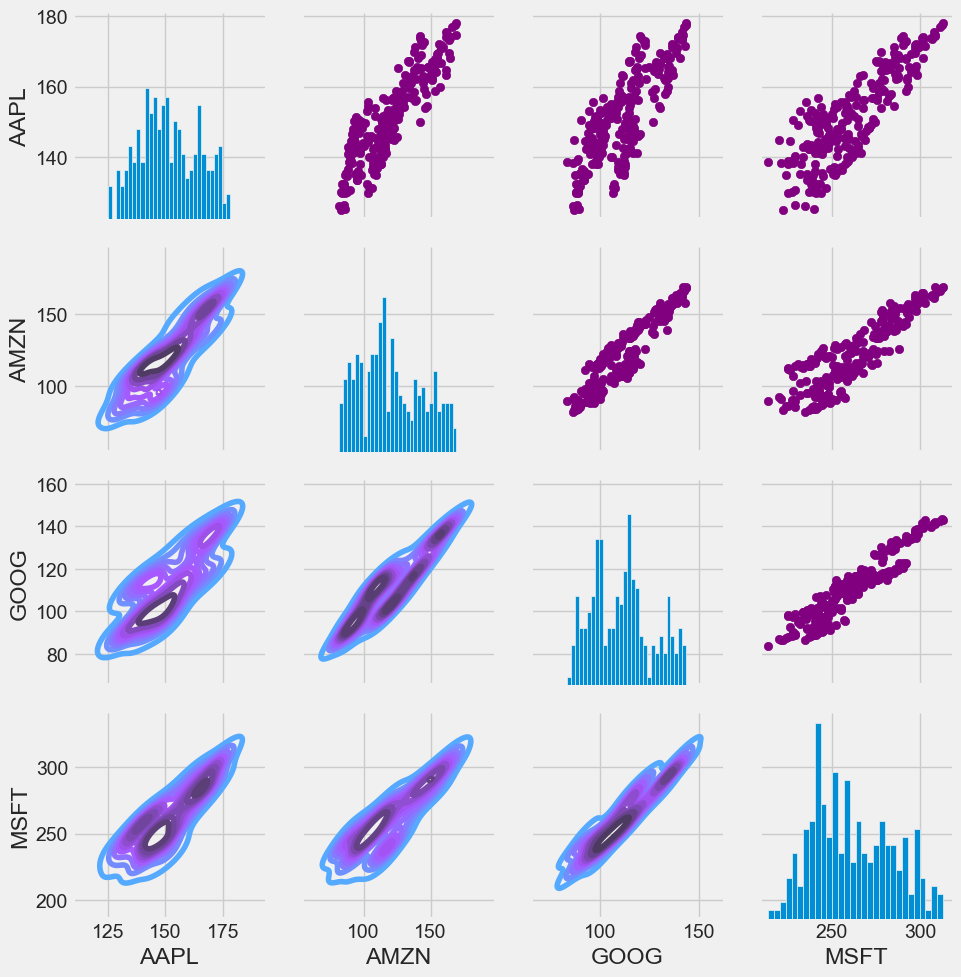

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

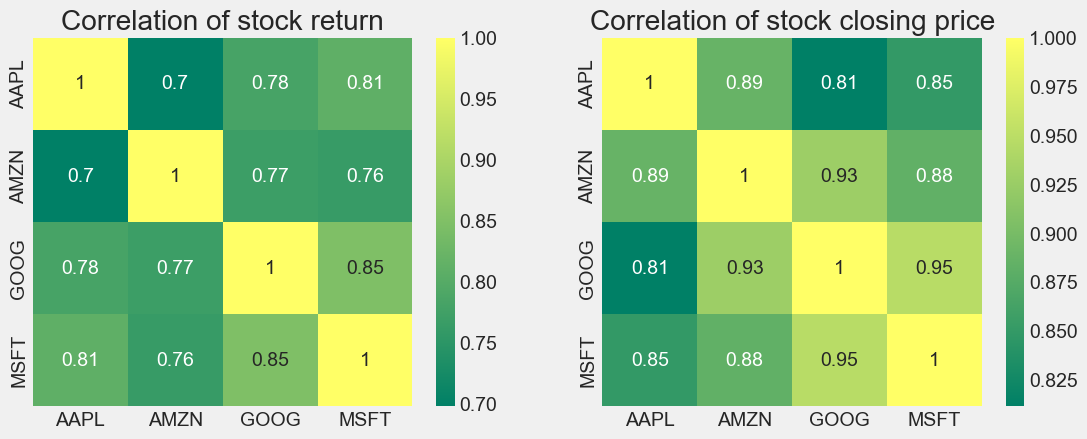

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

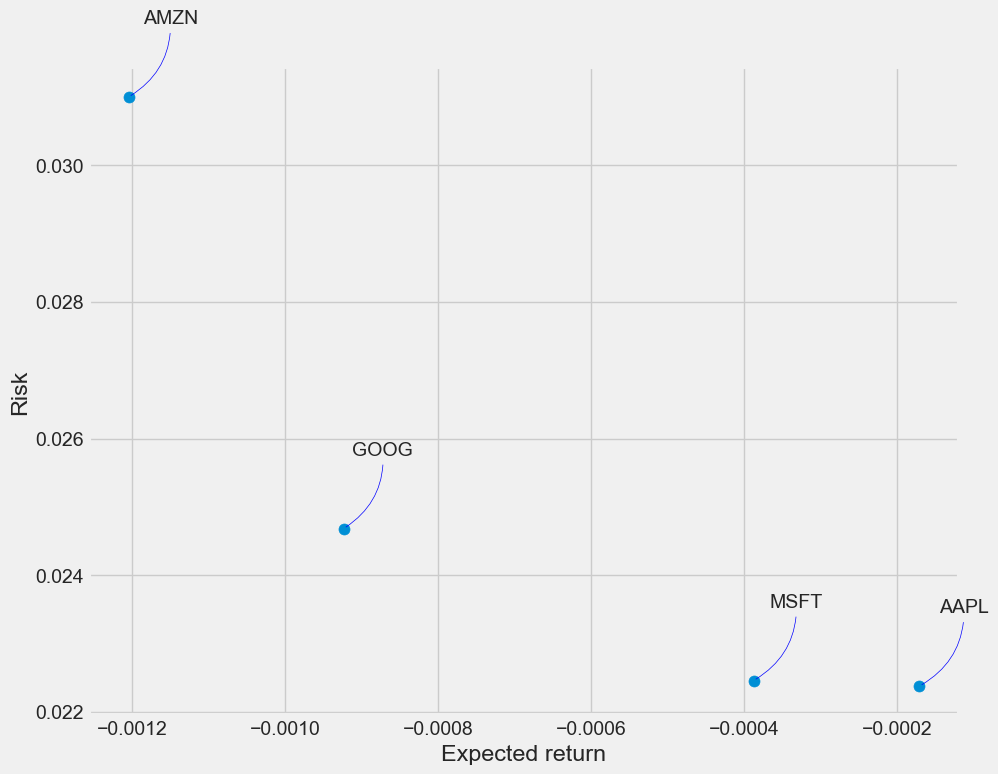

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
#df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
df = yf.download('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,26.549999,26.959999,26.389999,26.770000,21.466696,64731500
2012-01-04 00:00:00-05:00,26.820000,27.469999,26.780001,27.400000,21.971888,80516100
2012-01-05 00:00:00-05:00,27.379999,27.730000,27.290001,27.680000,22.196417,56081400
2012-01-06 00:00:00-05:00,27.530001,28.190001,27.530001,28.110001,22.541235,99455500
2012-01-09 00:00:00-05:00,28.049999,28.100000,27.719999,27.740000,22.244537,59706800
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,242.710007,25867400
2023-01-31 00:00:00-05:00,243.449997,247.949997,242.949997,247.809998,247.809998,26541100
2023-02-01 00:00:00-05:00,248.000000,255.179993,245.470001,252.750000,252.750000,31259900


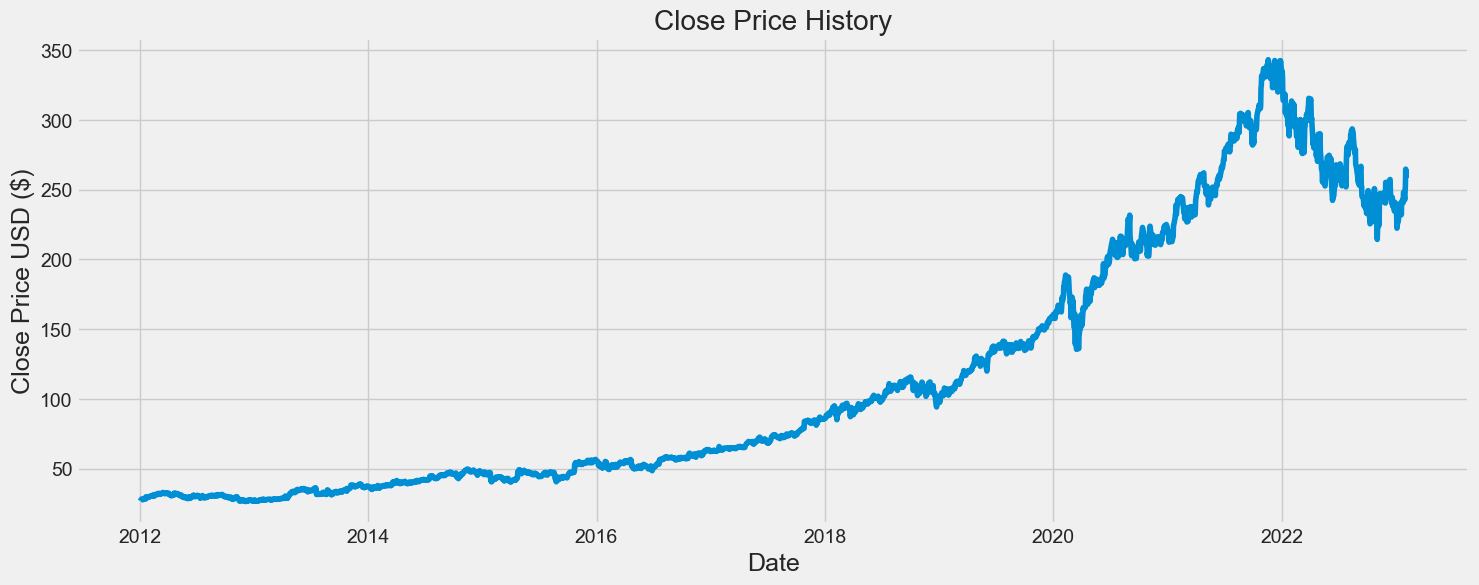

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2652

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.71471873],
       [0.75213114],
       [0.73239887]])

In [23]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2592/2592 [==============================] - 73s 26ms/step - loss: 0.0012


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions1 = model.predict(x_train)
predictions1 = scaler.inverse_transform(predictions1)

# Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_train) ** 2)))
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))



print(rmse1)
print(rmse)

81/81 [==============================] - 2s 28ms/step
140.13860914554434
8.278777295827217


592
592


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8132\1237743324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions']= predictions2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8132\1237743324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


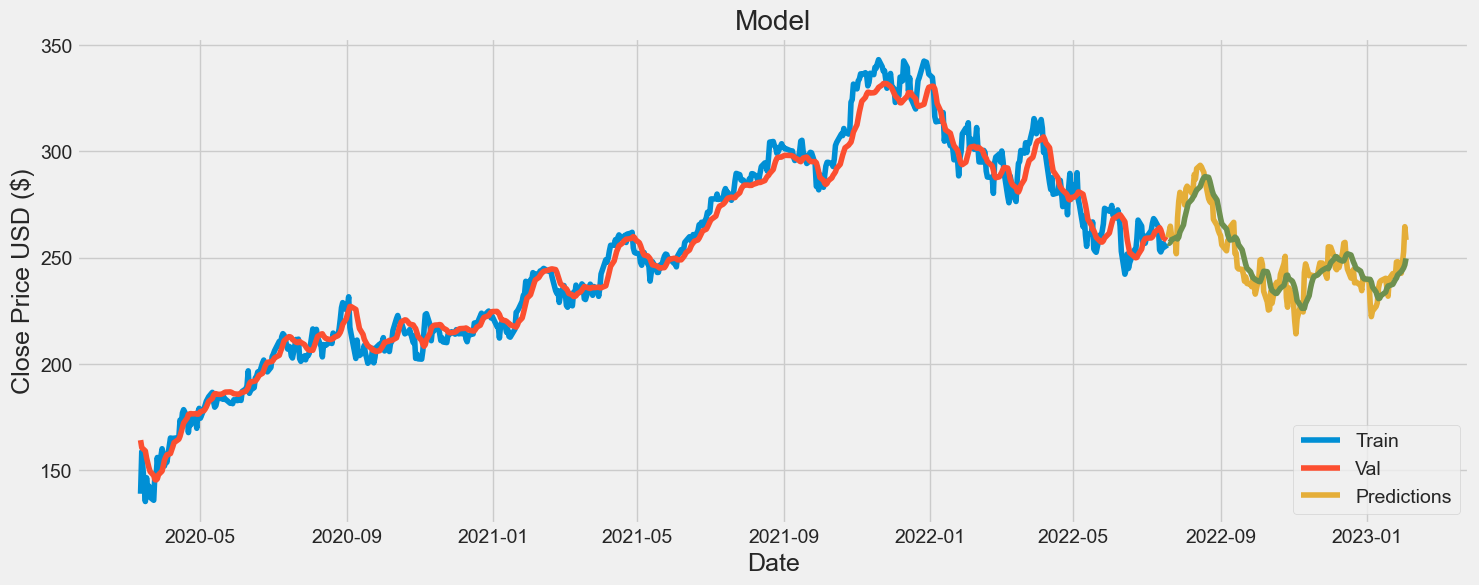

In [26]:
# Plot the data
st=2000
train = data[60+st:training_data_len]
predictions2=predictions1[st:]
print(len(train))
print(len(predictions2))
train['Predictions']= predictions2
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(train[['Close','Predictions']])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
len(test_data)

199

In [28]:
test_data

array([[0.80330874],
       [0.78190317],
       [0.8030246 ],
       [0.76987438],
       [0.81091751],
       [0.83115494],
       [0.79292164],
       [0.81486397],
       [0.80637119],
       [0.83225997],
       [0.79238498],
       [0.78411322],
       [0.75206793],
       [0.76760122],
       [0.73934457],
       [0.72292737],
       [0.74114417],
       [0.74234391],
       [0.75914005],
       [0.71891776],
       [0.71595002],
       [0.71411886],
       [0.7396603 ],
       [0.73640843],
       [0.74556418],
       [0.75623541],
       [0.77940898],
       [0.77508368],
       [0.77682018],
       [0.78363957],
       [0.76924291],
       [0.76523335],
       [0.77707271],
       [0.77047425],
       [0.75273101],
       [0.71547647],
       [0.68160006],
       [0.68864057],
       [0.71159312],
       [0.690156  ],
       [0.69861717],
       [0.71784434],
       [0.71591847],
       [0.73400895],
       [0.76191837],
       [0.75304674],
       [0.72649498],
       [0.738

In [29]:
x_input=test_data[139:].reshape(1,-1)
x_input.shape

(1, 60)

In [30]:
x_input

array([[0.63932564, 0.62556041, 0.68387323, 0.69691233, 0.6793585 ,
        0.68068451, 0.67992677, 0.6797689 , 0.67831663, 0.68093709,
        0.69034542, 0.6983962 , 0.69811206, 0.68002148, 0.67550676,
        0.72226435, 0.72084363, 0.7218855 , 0.70666795, 0.69062955,
        0.68826168, 0.69782788, 0.69157671, 0.71396099, 0.72788414,
        0.72883125, 0.70291092, 0.689272  , 0.67588561, 0.6801478 ,
        0.6884511 , 0.66875043, 0.67045528, 0.66486713, 0.6571952 ,
        0.67765361, 0.67389662, 0.67313889, 0.64005183, 0.61861466,
        0.62688641, 0.63380061, 0.63926253, 0.6611101 , 0.6697607 ,
        0.67203386, 0.67556992, 0.66123637, 0.64898656, 0.67515947,
        0.68261038, 0.68090548, 0.67639076, 0.6997222 , 0.70022736,
        0.68302083, 0.69912233, 0.71471873, 0.75213114, 0.73239887]])

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.6393256430498808,
 0.6255604071354305,
 0.6838732256106241,
 0.6969123273494567,
 0.6793585045595926,
 0.6806845075572626,
 0.6799267709123815,
 0.6797689030895526,
 0.6783166347383169,
 0.6809370864388896,
 0.6903454209506413,
 0.6983961981699557,
 0.6981120649935612,
 0.6800214819711796,
 0.675506760920148,
 0.7222643484770082,
 0.7208436344205399,
 0.7218855042418155,
 0.7066679518016337,
 0.6906295541270359,
 0.6882616813080902,
 0.6978278836426709,
 0.6915767128895133,
 0.7139609923760668,
 0.7278841442878419,
 0.7288312548758235,
 0.7029109192209873,
 0.6892719968345984,
 0.6758856051553407,
 0.6801477954992411,
 0.6884511034256865,
 0.6687504324037363,
 0.670455279636599,
 0.6648671344695244,
 0.6571952014854027,
 0.677653609152234,
 0.6738966247460835,
 0.6731388881012024,
 0.6400518253999945,
 0.6186146565014224,
 0.6268864101331005,
 0.633800606472341,
 0.6392625344603459,
 0.661110101888878,
 0.6697606997557486,
 0.6720338615158961,
 0.6755699176841787,
 0.661236367242443

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7132037]
61
1 day input [0.62556041 0.68387323 0.69691233 0.6793585  0.68068451 0.67992677
 0.6797689  0.67831663 0.68093709 0.69034542 0.6983962  0.69811206
 0.68002148 0.67550676 0.72226435 0.72084363 0.7218855  0.70666795
 0.69062955 0.68826168 0.69782788 0.69157671 0.71396099 0.72788414
 0.72883125 0.70291092 0.689272   0.67588561 0.6801478  0.6884511
 0.66875043 0.67045528 0.66486713 0.6571952  0.67765361 0.67389662
 0.67313889 0.64005183 0.61861466 0.62688641 0.63380061 0.63926253
 0.6611101  0.6697607  0.67203386 0.67556992 0.66123637 0.64898656
 0.67515947 0.68261038 0.68090548 0.67639076 0.6997222  0.70022736
 0.68302083 0.69912233 0.71471873 0.75213114 0.73239887 0.71320373]
1 day output [[0.71741176]]
2 day input [0.68387323 0.69691233 0.6793585  0.68068451 0.67992677 0.6797689
 0.67831663 0.68093709 0.69034542 0.6983962  0.69811206 0.68002148
 0.67550676 0.72226435 0.72084363 0.7218855  0.70666795 0.69062955
 0.68826168 0.69782788 0.69157671 0.71396099 0.72788414 0.72883

In [34]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [35]:
lst_output

[[0.7132037281990051],
 [0.7174117565155029],
 [0.7196614742279053],
 [0.7208314538002014],
 [0.7214258313179016],
 [0.7217246890068054],
 [0.7218801975250244],
 [0.7219714522361755],
 [0.7220382690429688],
 [0.7220985293388367],
 [0.7221599221229553],
 [0.722224235534668],
 [0.7222918272018433],
 [0.72236168384552],
 [0.7224326729774475],
 [0.7225039005279541],
 [0.7225749492645264],
 [0.7226452827453613],
 [0.7227145433425903],
 [0.7227826714515686],
 [0.7228496074676514],
 [0.7229154109954834],
 [0.7229800224304199],
 [0.7230433821678162],
 [0.7231057286262512],
 [0.7231669425964355],
 [0.7232271432876587],
 [0.7232864499092102],
 [0.7233447432518005],
 [0.7234020233154297]]

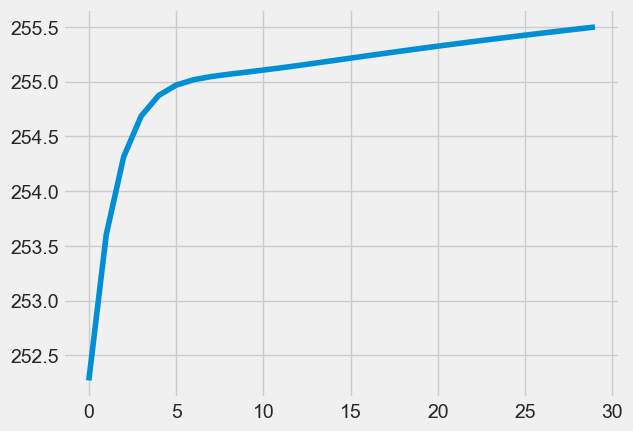

In [36]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))

plt.plot(scaler.inverse_transform(lst_output))

592
592


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8132\1160273658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions']= predictions2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8132\1160273658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


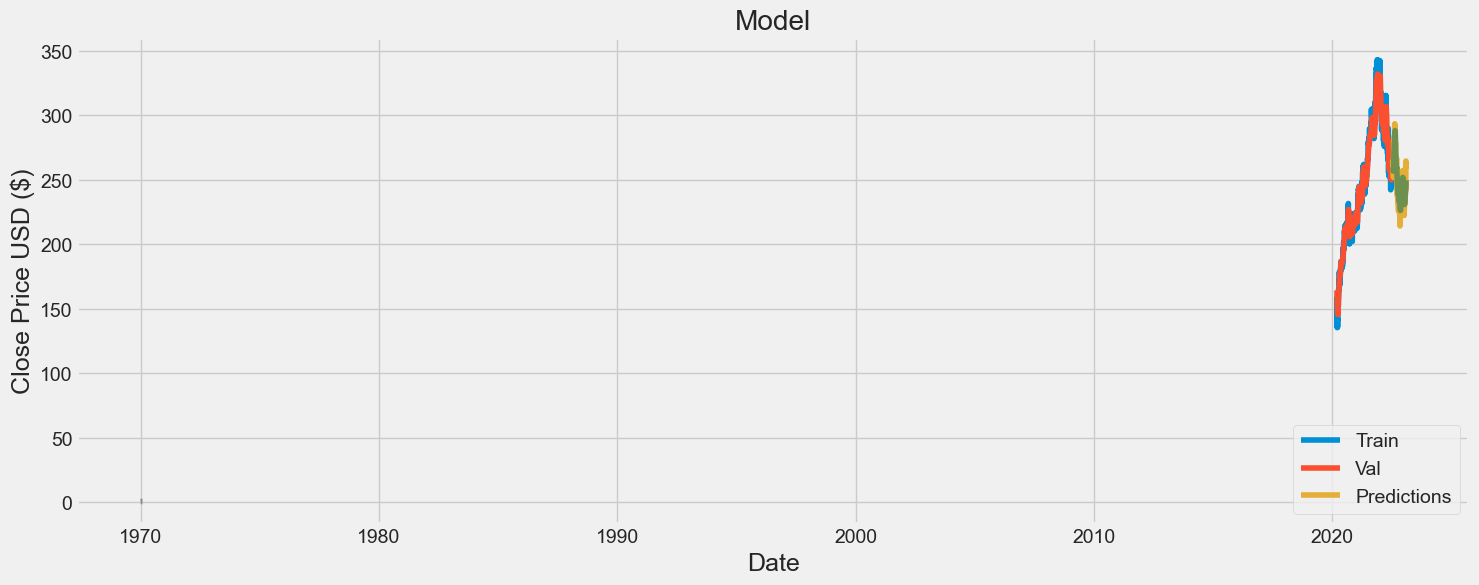

In [37]:
# Plot the  forcated data
train = data[60+st:training_data_len]
predictions2=predictions1[st:]
print(len(train))
print(len(predictions2))
train['Predictions']= predictions2
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(train[['Close','Predictions']])
plt.plot(test[['Close', 'Predictions']])
plt.plot(lst_output)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)

In [38]:
len()

TypeError: len() takes exactly one argument (0 given)